<a href="https://colab.research.google.com/github/fahmifathrr/Clustering/blob/main/DTI%20Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CLUSTERING** | Fahmi Fathur Rahman DS0109 | Telkom DTI 2020

Clustering merupakan proses partisi satu set objek data ke dalam himpunan bagian yang disebut dengan cluster. Objek yang di dalam cluster memiliki kemiripan karakteristik antar satu sama lainnya dan berbeda dengan cluster yang lain. Partisi tidak dilakukan secara manual melainkan dengan suatu algoritma clustering. Oleh karena itu, clustering sangat berguna dan bisa menemukan group atau kelompokyang tidak dikenal dalam data.


Berikut langkah melakukan Clustering menggunakan data mall Customer

PREPROCESSING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/fahmifathrr/Clustering/main/Mall_Customers.csv', sep=',') 
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
feature = df.copy()
feature = df.drop(['CustomerID'], axis=1)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


VISUALISASI

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

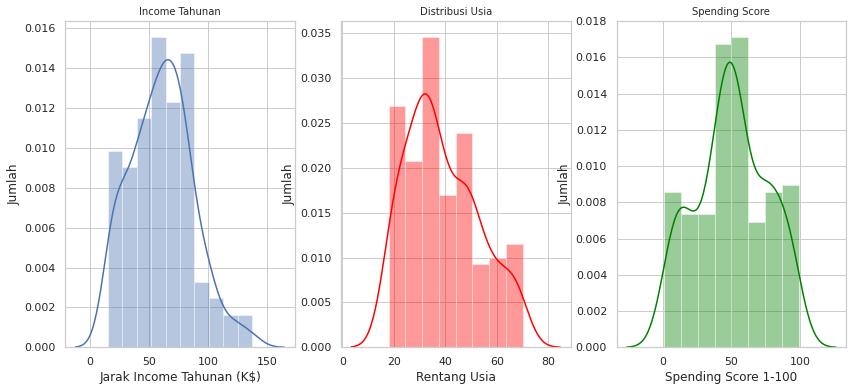

In [11]:
plt.rcParams['figure.figsize']=(14,6)

plt.subplot(1, 3, 1)
sns.set(style= 'whitegrid')
sns.distplot(df['Annual Income (k$)'])
plt.title('Income Tahunan', fontsize=10)
plt.xlabel('Jarak Income Tahunan (K$)')
plt.ylabel('Jumlah')

plt.subplot(1, 3, 2)
sns.set(style= 'whitegrid')
sns.distplot(df['Age'], color='red')
plt.title('Distribusi Usia', fontsize=10)
plt.xlabel('Rentang Usia')
plt.ylabel('Jumlah')

plt.subplot(1, 3, 3)
sns.set(style= 'whitegrid')
sns.distplot(df['Spending Score (1-100)'], color='green')
plt.title('Spending Score', fontsize=10)
plt.xlabel('Spending Score 1-100')
plt.ylabel('Jumlah')

plt.show()

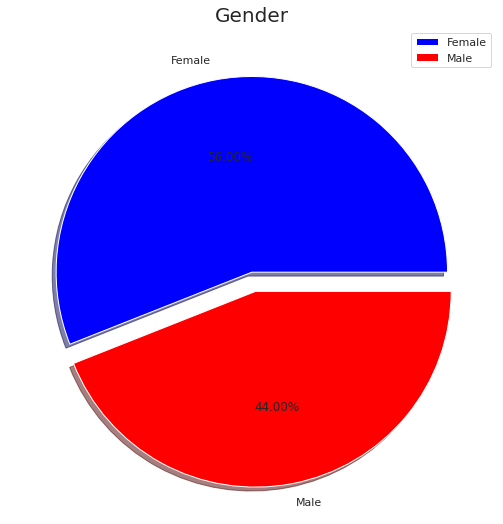

In [12]:
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['blue', 'red']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

Menentukan nilai K

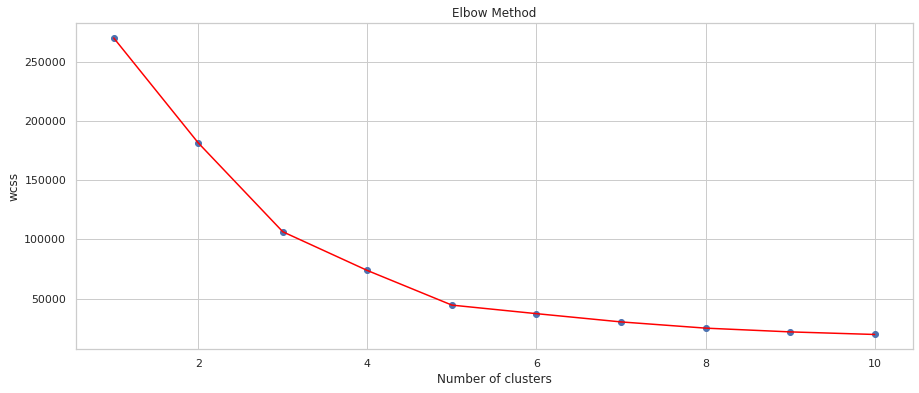

In [25]:
# Transform Data Frame to Numpy Array
income_spend = df[['Annual Income (k$)','Spending Score (1-100)']].to_numpy()

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(income_spend)
    wcss.append(kmeans.inertia_)
  
# Visualize 
plt.figure(1 , figsize = (15 ,6))
plt.plot(range(1,11),wcss, 'o')
plt.plot(range(1,11),wcss, color='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [26]:
# Silhoutte Method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

temp = 0
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(income_spend)
    label = kmeans.labels_
    sil_coeff = silhouette_score(income_spend, label, metric='euclidean')
    if (sil_coeff > temp):
      temp = sil_coeff
      best = n_cluster
    print('For n_clusters={}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))
print('\nBest Cluster = ',best)

For n_clusters=2, The Silhouette Coefficient is 0.2968969162503008
For n_clusters=3, The Silhouette Coefficient is 0.46761358158775435
For n_clusters=4, The Silhouette Coefficient is 0.4931963109249047
For n_clusters=5, The Silhouette Coefficient is 0.553931997444648
For n_clusters=6, The Silhouette Coefficient is 0.5376203956398481
For n_clusters=7, The Silhouette Coefficient is 0.5270287298101395
For n_clusters=8, The Silhouette Coefficient is 0.4572211842776841
For n_clusters=9, The Silhouette Coefficient is 0.4565077334305076
For n_clusters=10, The Silhouette Coefficient is 0.44096594426188596

Best Cluster =  5


Aplikasi K-Means

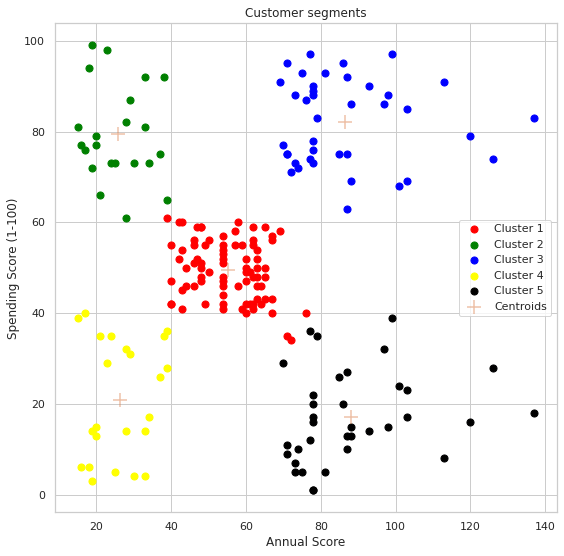

In [31]:
# Apply the K-Means Model to the Data
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster = kmeans.fit_predict(income_spend)

# Visualising cluster for K=5
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.scatter(income_spend[cluster == 0, 0], income_spend[cluster == 0, 1], s = 50, label = 'Cluster 1', c= 'red')
plt.scatter(income_spend[cluster == 1, 0], income_spend[cluster == 1, 1], s = 50, label = 'Cluster 2', c= 'green')
plt.scatter(income_spend[cluster == 2, 0], income_spend[cluster == 2, 1], s = 50, label = 'Cluster 3', c= 'blue')
plt.scatter(income_spend[cluster == 3, 0], income_spend[cluster == 3, 1], s = 50, label = 'Cluster 4', c= 'yellow')
plt.scatter(income_spend[cluster == 4, 0], income_spend[cluster == 4, 1], s = 50, label = 'Cluster 5', c= 'black')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=200,marker='+', alpha=0.5, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual Score')
plt.legend()

plt.show()

Hierarki Modeling Cluster

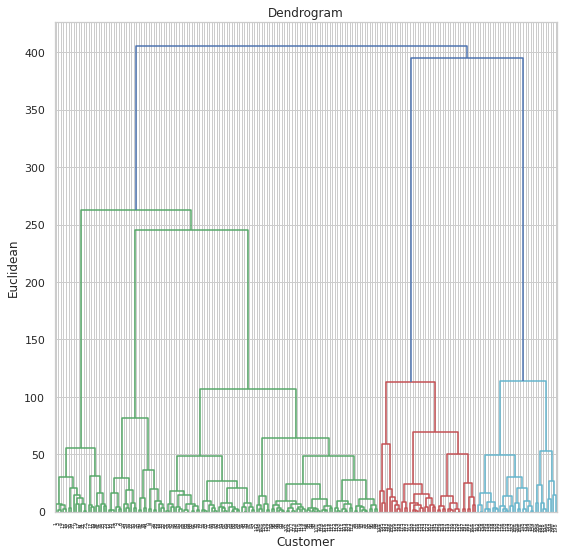

In [28]:
# Modeling and Visualizing Clusters by Dendogram
import scipy.cluster.hierarchy as sch
dend = sch.dendrogram(sch.linkage(income_spend, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean')
plt.show()

Visualisasi Cluster

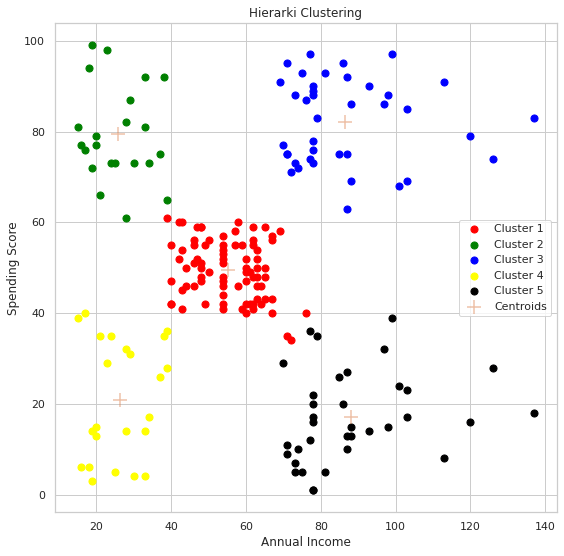

In [32]:
# Apply the Hierarchical Clustering Model to the Dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hcluster = hc.fit_predict(income_spend)


#Visualising Cluster for K=5
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.scatter(income_spend[cluster == 0, 0], income_spend[cluster == 0, 1], s = 50, label = 'Cluster 1', c= 'red')
plt.scatter(income_spend[cluster == 1, 0], income_spend[cluster == 1, 1], s = 50, label = 'Cluster 2', c= 'green')
plt.scatter(income_spend[cluster == 2, 0], income_spend[cluster == 2, 1], s = 50, label = 'Cluster 3', c= 'blue')
plt.scatter(income_spend[cluster == 3, 0], income_spend[cluster == 3, 1], s = 50, label = 'Cluster 4', c= 'yellow')
plt.scatter(income_spend[cluster == 4, 0], income_spend[cluster == 4, 1], s = 50, label = 'Cluster 5', c= 'black')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=200,marker='+', alpha=0.5, label='Centroids')
plt.title('Hierarki Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()

plt.show()


Terdapat 5 Kelompok Cluster berdasarkan annual income dan spending score, tiap-tiap Cluster memiliki persamaan dan memiliki segmentasi untuk tiap masing-masing cluster. Hal ini dapat berguna untuk menentukan produk yang akan di tawarkan agar tepat sasaran, selain itu Clustering juga dapat memberikan insight baru yang sebelumnya tidak ditemukan.